<h1>An Introduction to Linear Algebra for Quantum Computing</h1>

In [4]:
from matplotlib import pyplot as plt
import numpy as np
from qiskit import *
from qiskit.visualization import plot_bloch_vector

**Introduction**

Linear algebra is the language of quantum computing. For this reason, it is crucial to develop a good understanding of the basic mathematical concepts that are built upon in order to arrive at many of the amazing and interesting constructions seen in quantum computation! The goal of this section of the textbook is to start at the absolute basics of linear algebra: vectors and vector spaces, and build a foundation that the reader can then leverage in their study of quantum computing.

**Vectors and Vector Spaces**

We will start our investigation into introductory linear algebra by first discussing one of the most important mathematical quantities in quantum computation, the vector!

Formally, a **vector** $|v\rangle$ is defined as elements of a set known as a vector space. A more intuitive and geometric definition is that a vector "is a mathematical quantity with both direction and magnitude". For instance, consider a vector with $x$ and $y$ components of the form $\begin{pmatrix} 3 \\ 5 \end{pmatrix}$. This vector can be visualized as an arrow pointing in the direction of $3$ unit down the $x$ axis and $5$ units up the $y$ axis:

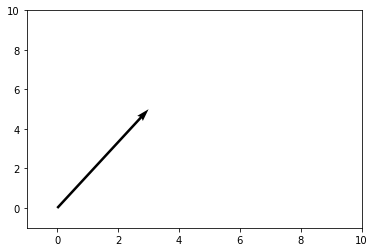

In [23]:
plt.figure()
ax = plt.gca()
ax.quiver([3], [5], angles='xy', scale_units='xy', scale=1)
ax.set_xlim([-1, 10])
ax.set_ylim([-1, 10])
plt.draw()
plt.show()

Note that "tail" of the vector doesn't have to be positioned at the origin, all that matters is that it is pointing in the correct direction. 

Now, let's talk about a concrete example of vectors in quantum computing. Oftentimes, in quantum computing, we deal with **state vectors**, which are simply vectors, no different than the one just presented. They point to a specific point in space that corresponds to a particular quantum state. Oftentimes, this is visualized using a Bloch sphere. For instance, a vector, representing the state of a quantum system could look something like this arrow, enclosed inside the Bloch sphere, which is the so-called "state" space of all possible points to which our state vectors can "point":

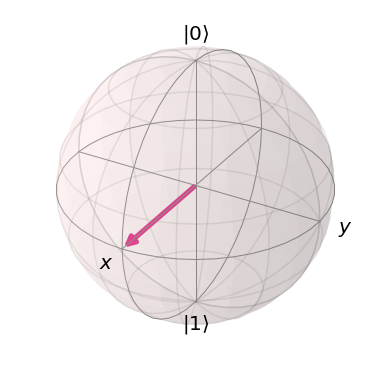

In [30]:
plot_bloch_vector([1, 0, 0])

Hopefully this helps to illuminate how vectors can be used to store information about quantum states. This particular state corresponds to an even superposition between $|0\rangle$ and $|1\rangle$ (you can see that the arrow is halfway between $|0\rangle$ at the top and $|1\rangle$ at the bottom of the sphere!). Our vectors are allowed to rotate anywhere on the surface of the sphere, and each of these points represents a different quantum state!

Now that we have talked about vectors a bit more intuitively, in the context of quantum computing, we can go back to our more formal definition of a vector, which is that a vector is an element of a vector space. From this, it follows that we must define a vector space. A **vector space** $V$ over a **field** F is a set of objects (vectors), where two conditions hold. Firstly, **vector addition** of two vectors $|a\rangle, \ |b\rangle \ \in \ V$ will yield a third vector $|a\rangle \ + \ |b\rangle \ = \ |c\rangle$, also contained in $V$. The second condition is that **scalar multiplication** between some $|a\rangle \ \in \ V$ and some $n \ \in \ F$, denoted by $n|a\rangle$ is also contained within $V$.

We will now clarify this previous definition by working through a basic example. Let us demonstrate that the set $\mathbb{R}^2$ over the field $\mathbb{R}$ is a vector space. We assert that

<br>
$$\begin{pmatrix} x_1 \\ y_1 \end{pmatrix} \ + \ \begin{pmatrix} x_1 \\ y_1 \end{pmatrix} \ = \ \begin{pmatrix} x_1 \ + \ x_2 \\ y_1 \ + \ y_2 \end{pmatrix}$$
<br>

is contained within $\mathbb{R}^2$. Well, this is evidently the case, as the sum of two real numbers is a real number, making both components of the newly-formed vector real numbers, and in turn making the vector be contained in $\mathbb{R}^2$ by definition. We also assert that:

<br>
$$n |v\rangle \ = \ \begin{pmatrix} nx \\ ny \end{pmatrix} \ \in \ V \ \ \ \ \forall n \ \in \ \mathbb{R}$$
<br>

This is true as well, as the product of a real number and a real number is in turn a real number, making the entries of the new vector real, and thus proving this statement.

**Matrices and Matrix Operations**

Now that we have introduced vectors, we can turn our attention to another fundamental concept: a **matrix**. The best way to think of matrices from a quantum computational/quantum mechanical perspective is the fact that matrices are mathematical objects that transform vectors to other vectors:

<br>
$$|v\rangle \ \rightarrow \ |v'\rangle \ = \ M |v\rangle$$
<br>

Generally, matrices are written as "arrays" of numbers, looking something like this:

<br>
$$M \ = \ \begin{pmatrix} 1 & -2 & 3 \\ 1 & 5i & 0 \\ 1 \ + \ i & 7 & -4 \end{pmatrix}$$
<br>

We can actually "apply" a matrix to a vector by performing matrix multiplication. In general, matrix multiplication between two matrices involves taking the first row of the first matrix, and multiplying each element by its "partner" in the first column of the second matrix (the first number of the row is multiplied by the first number of the column, second number of the row and second number of column, etc.) These new numbers are then added up, and we have the first element of the first row of the new matrix! To fill in the rest of the first row, we repeat this process for the second, third, etc. columns of the second matrix. Then we take the second row of the first matrix, and repeat the process for each column of the second matrix, getting the second row. We perform this process until we have used all rows of the first matrix. The resulting matrix is our new matrix! That may have been confusing, so here is an example:

<br>
$$\begin{pmatrix} 2 & 0 \\ 5 & -1 \end{pmatrix} \begin{pmatrix} -3 & 1 \\ 2 & 1 \end{pmatrix} \ = \ \begin{pmatrix} (2)(-3) + (0)(2) & (2)(1) \ + \ (0)(1) \\ (5)(-3) + (-1)(2) & (5)(1) \ + \ (-1)(1) \end{pmatrix} \ = \ \begin{pmatrix} -6 & 2 \\ -17 & 4 \end{pmatrix}$$
<br>

As you can see, we simply used the previously outlined process to arrive at the final matrix! Going back to "applying" matrices to vectors, all we have to realize is that a vector is simply a matrix with $1$ column, so matrix multiplication behaves the exact same way! As we previously discussed, in quantum computing we have some quantum state vector that we are manipulating in order to perform quantum computation. Well, as you can probably guess, the way that we represent the manipulation of that vector mathematically is through the application of matrices. We manipulate qubits in our quantum computer by applying sequences of **quantum gates**. As it turns out, we can express each of these quantum gates as a different matrix that can be "applied" to a state vector, thus changing the state. For instance, one of the most commonly seen quantum gates is the Pauli-X gate, which is represented by the follwing matrix:

<br>
$$\sigma_x \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$
<br>

This gate acts kind of similarly to the classical NOT logic gate. It maps the computational basis state $|0\rangle$ to $|1\rangle$ and $|1\rangle$ to $|0\rangle$ (it "flips" the state). As actual column vectors, we write the two basis states:

<br>
$$|0\rangle \ = \ \begin{pmatrix} 1 \\ 0 \end{pmatrix} \ \ \ \ \ \ \ |1\rangle \ = \ \begin{pmatrix} 0 \\ 1 \end{pmatrix}$$
<br>

So when we apply this matrix to each of the vectors:

<br>
$$\sigma_x |0\rangle \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} \ = \ \begin{pmatrix} (0)(1) \ + \ (1)(0) \\ (1)(1) \ + \ (0)(0) \end{pmatrix} \ = \ \begin{pmatrix} 0 \\ 1 \end{pmatrix} \ = \ |1\rangle$$
<br>
$$\sigma_x |1\rangle \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} \ = \ \begin{pmatrix} (0)(0) \ + \ (1)(1) \\ (1)(0) \ + \ (0)(1) \end{pmatrix} \ = \ \begin{pmatrix} 1 \\ 0 \end{pmatrix} \ = \ |0\rangle$$
<br>

And so the matrix acts on the state vectors exactly as expected!

Within quantum computation, we often deal with two very important types of matrices: **Hermitian** and **Unitary** matrices. The former is more important in the study of quantum mechanics, but is still definitely worth talking about in a study of quantum computation. The latter is of unparalleled importance in both quantum mechanics and quantum computation. If there is one concept that the reader should take away from this entire linear algebra section, it should be the idea of a unitary matrix.

Firstly, a Hermitian matrix is simply a matrix that is equal to its **conjugate transpose** (denoted with a $\dagger$ symbol). This essentially means taking a matrix, flipping the sign in its imaginary components, and then reflecting the entries of the matrix across its main diagonal (the diagonal that goes from the top left corner to the bottom right corner). For instance, a matrix that we commonly use in quantum computation, the Pauli-Y matrix is Hermitian:

<br>
$$\sigma_y \ = \ \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \ \Rightarrow \ \sigma_y^{\dagger} \ = \ \begin{pmatrix} 0 & -(i) \\ -(-i) & 0 \end{pmatrix} \ = \ \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \ = \ \sigma_y$$
<br>

Notice how we switched the places of the $i$ and the $-i$ (as we are reflecting across the main diagonal, the zeroes remain unchanged), and then flip the sign. A unitary matrix is very similar. Specifically, a unitary matrix is a matrix such that the **inverse matrix** is equal to the conjugate transpose of the original matrix.

Let's go on a quick tangent and talk a bit about what the **inverse matrix** is. The inverse of some matrix $A$, denoted as $A^{-1}$ is simply a matrix such that:

<br>
$$A^{-1} A \ = \ A A^{-1} \ = \ \mathbb{I}$$
<br>

Where $\mathbb{I}$ is the identity matrix. The identity matrix is just a matrix that has zeroes everywhere, except along the main diagonal (top left to bottom right), which is all ones. The reason why it is called the identity matrix is because it acts trivially on any other matrix (it has no effect). If you don't believe me, check it in a couple cases and convince yourself!

I don't want to go too deep into the inverse matrix, and frankly, when matrices get larger than $2 \ \times \ 2$, calculating the inverse becomes a huge pain and is left to computers for the most part. For a $2 \ \times \ 2$ matrix, the inverse is defined as:

<br>
$$A \ = \ \begin{pmatrix} a & b \\ c & d \end{pmatrix} \ \Rightarrow \ A^{-1} \ = \ \frac{1}{\text{det} \ A} \begin{pmatrix} d & -b \\ -c & a \end{pmatrix}$$
<br>

Where $\text{det} \ A$ is the **determinant** of the matrix. In the $2 \ \times \ 2$ case, $\text{det} \ A \ = \ ad \ - \ bc$.

To be completely honest, the calculating of inverse matrices is **rarely** important in quantum computing. Since most of the matrices we deal with are unitary, we already know that the inverse is simply given by taking the conjugate transpose, so we don't have to go through this annoying process of rigorously calculating the inverse.

Anyways, going back to to unitary matrices, we can now look at a basic example. As it turns out, the Pauli-Y matrix, in addition to being Hermitian, is also unitary (it is equal to its conjugate transpose, which is also equal to its inverse, therefore, the Pauli-Y matrix is its own inverse, that's pretty cool!). We can verify that this matrix is in fact unitary:

<br>
$$\sigma_y \ = \ \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \ \ \ \ \ \sigma_y^{\dagger} \ = \ \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix} \ \Rightarrow \ \sigma_y^{\dagger} \sigma_y \ = \ \begin{pmatrix} (0)(0) + (-i)(i) & (0)(-i) \ + \ (-i)(0) \\ (i)(0) \ + \ (0)(i) &  (i)(-i) \ + \ (0)(0) \end{pmatrix} \ = \ \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \ = \ \mathbb{I}$$
<br>

The reason why unitary matrices are so important in the context of quantum computation will become more apparent in the section on Hilbert spaces, but the basic idea is that evolution of a quantum state by application of a unitary matrix "preserves" the quantum state in a sense (we will discuss this more rigorously in the Hilbert spaces section, and even more so in the quantum mechanics subtopic of the textbook).

**Spanning Sets, Linear Dependence and Bases**

We are now in a position to discuss the construction of vector spaces. Consider some vector space $V$. We say that some set of vectors $S$ spans a subspace $V_S \ \subset \ V$ (subset closed under vector space operations) of the vector space if we can write any vector in the subspace as a **linear combination** of vectors contained within the spanning set. 

A linear combination of some collection vectors $|v_1\rangle, \ ..., \ |v_n\rangle$ in some vector space over a field $F$ is defined as an arbitrary sum of these vectors (which of course will be another vector, which we will call $|v\rangle$!):

<br>
$$|v\rangle \ = \ f_1 |v_1\rangle \ + \ f_2 |v_2\rangle \ + \ ... \ + \ f_n |v_n\rangle \ = \ \displaystyle\sum_{i} \ f_i |v_i\rangle$$
<br>

Where each $f_i$ is some element of $F$. Now, if we have a set of vectors that spans a space, we are simply saying that **any other vector** in the vector space can be written as a linear combination of these vectors.

Now, we are in a position to define a **basis**, which is a specific case of a spanning set, but first, we must talk about **linear dependence**. This is a fairly straightforward idea as well. A set of vectors $|v_1\rangle, \ ..., \ |v_n\rangle$ is said to be linearly dependent if there exist corresponding coefficients for each vector, $b_i \ \in \ F$, such that:

<br>
$$b_1 |v_1\rangle \ + \ b_2 |v_2\rangle \ + \ ... \ + \ b_n |v_n\rangle \ = \ \displaystyle\sum_{i} \ b_i |v_i\rangle \ = \ 0$$
<br>

Where at least one of the $b_i$ coefficients is non-zero. This is equivalent to the more intuitive statement that "the set of vectors can be expressed as linear combinations of each other". This can be proven fairly simply. Let us have the set $\{|v_1\rangle, \ ..., \ |v_n\rangle \}$ along with the corresponding coefficients $\{|b_1\rangle, \ ..., \ |b_n\rangle \}$, such that the linear combination is equal to $0$. Since there is at least one vector with a non-zero coefficient, we choose a term in the linear combination $b_a |v_a\rangle$:

<br>
$$\displaystyle\sum_{i} \ b_i |v_i\rangle \ = \ b_a |v_a\rangle \ + \ \displaystyle\sum_{i, \ i \ \neq \ a} \ b_i |v_i\rangle \ = \ 0 \ \Rightarrow \ |v_a\rangle \ = \ - \displaystyle\sum_{i, \ i \ \neq \ a} \ \frac{b_i}{b_a} |v_i\rangle \ = \ \displaystyle\sum_{i, \ i \ \neq \ a} \ c_i |v_i\rangle$$
<br>

In the case that $b_a$ is the only non-zero coefficient, it is necessarily true that $|v_a\rangle$ is the null vector, automatically making the set linearly dependent. If this is not the case, $|v_a\rangle$ has been written as a linear combination of non-zero vectors, as was shown above. To prove the converse, we assume that there exists some vector $|v_a\rangle$ in the subspace $|v_1\rangle, ..., \ |v_n\rangle$ that can be written as a linear combination of other vectors in the subspace. This means that:

<br>
$$|v_a\rangle \ = \ \displaystyle\sum_{s} b_s |v_s\rangle$$
<br>

Where $s$ is an index that runs over a subset of the subspace. It follows that:

<br>
$$|v_a\rangle \ - \ \displaystyle\sum_{s} b_s |v_s\rangle \ = \ |v_a\rangle \ - \ (|v_{s_1}\rangle \ + \ ... \ + \ |v_{s_r}\rangle) \ = \ 0$$
<br>

For all vectors in the subspace that are not included in the subset indexed by $s$, we set their coefficients, indexed by $q$ equal to $0$. Thus,

<br>
$$|v_a\rangle \ - \ (|v_{s_1}\rangle \ + \ ... \ + \ |v_{s_r}\rangle) \ + \ (0)(|v_{q_1}\rangle \ + \ ... \ + \ |v_{q_t}\rangle) \ = \ 0$$
<br>

Which is a linear combination of all elements in the subspace $|v_1\rangle, \ ..., \ |v_n\rangle$ which is equal to $0$, thus completing the proof that the two definitions of linear dependence imply each other.

Let's now consider a basic example. For instance, consider the set of two vectors in $\mathbb{R}^2$, consisting of $|a\rangle \ = \ \begin{pmatrix} 1 \\ 0 \end{pmatrix}$ and $|b\rangle \ = \ \begin{pmatrix} 2 \\ 0 \end{pmatrix}$. Well, for example, if we choose the field over our vector space to be $\mathbb{R}$, then we can create a linear combination of these vectors that equates to $0$. For example:

<br>
$$2|a\rangle \ - \ |b\rangle \ = \ 0$$
<br>

A set of vectors is said to be **linearly independent** if a linear combination of vectors is $0$ only if every coefficient is equal to $0$.

The notion of a basis is simply a **linearly independent spanning set**. In this sense, the basis of a vector space is the minimal possible set that spans the entire space. We call the size of the basis set the **dimension** of the vector space.

The reason why bases and spanning sets are so important is becasue they allow us to "shrink down" vector spaces and express them in terms of only a few vectors rather than a ton! Oftentimes, we can come to certain conclusions about our basis set that we can generalize to the entire vector space, simply because we know every vector in the space is just a linear combination of the basis vectors. Consider in quantum computation, how one of the bases that we often deal with is $|0\rangle, \ |1\rangle$. We can write any other qubit state as a linear combination of these basis vectors. For instance, the linear combination

<br>
$$\frac{|0\rangle \ + \ |1\rangle}{\sqrt{2}}$$
<br>

represents a superposition between the $|0\rangle$ and $|1\rangle$ basis state, with equal probability of measuring the state to be in either one of the basis vector states. (this is kind of intuitive, as the "weight" or the "amount of each basis vector" in the linear combination is equal, both being scaled by $1/\sqrt{2}$).

**Hilbert Spaces, Orthonormality, and the Inner Product**

Hilbert Spaces are one of the most important mathematical constructs in quantum mechanics and quantum computation. Less rigorously, a Hilbert space can be thought of as the space state in which all quantum state vectors "live". The main fact that differentiates a Hilbert space from any random vector space is that a Hilbert space is equipped with an **inner product**, which is an operation that can be performed between two vectors, returning a scalar. 

In the context of quantum mechanics and quantum computation, the inner product between two state vectors returns a scalar quantity representing the amount to which the first vector lies along the second vector. From this, the probabilities of measurement in different quantum states, among other things can be calculated (this will be discussed more in the quantum mechanics subtopic). 

For two vectors $|a\rangle$ and $|b\rangle$ in a Hilbert space, we denote the inner product as $\langle a | b \rangle$, where $\langle a |$ is equal to the conjugate transpose of $|a\rangle$, denoted $|a\rangle^{\dagger}$. Thus, the inner product between two vectors of the Hilbert space looks something like:

<br>
$$\langle a | b \rangle \ = \ \begin{pmatrix} a_1^{*} & a_2^{*} & ... & a_n^{*} \end{pmatrix} \begin{pmatrix} b_1 \\ b_2 \\ . \\ . \\ . \\ b_n \end{pmatrix} \ = \ a_1^{*} b_1 \ + \ a_2^{*} b_2 \ + \ ... \ + \ a_n^{*} b_n$$
<br>

Where $*$ denotes the complex conjugate of the vector.

One of the most important conditions for a Hilbert space representing a quantum system is that the inner product of a vector with itself is equal to one: $\langle \psi | \psi \rangle \ = \ 1$. This is the so-called normalization condition, and essentially just states that the length of the vector squared (each componenet of the vector is squared and summed together, by defintion of the inner product) must be equal to one. The physical significance of this is that the length of a vector in a particular direction is representative of the "probability amplitude" of the quantum system with regards to being measured in that particular state. Obviously, the probability of the quantum system being measured in the state that it is actually in must be $1$, after all, the sum of the probabilities of finding the quantum system in any particular state has to equal one (I mean, it has to be in **some** state!).

Let's consider the Bloch sphere:

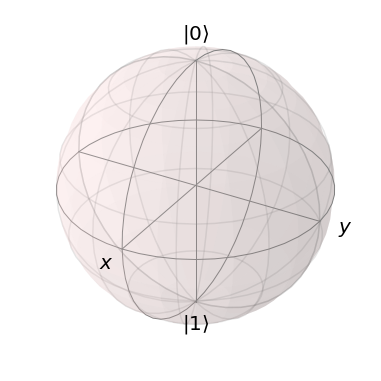

In [32]:
plot_bloch_vector([0, 0, 0])

The surface of this sphere, along with the inner product between qubit state vectors, is a valid Hilbert space! In addition to this, it can be seen that the normalization condition holds true, as the radius of the Bloch sphere is $1$, therefore the length squared of each vector must also be equal to one!

The last thing that is worth noting about Hilbert spaces and the inner product is their relationship to **unitary matrices**. The reason why unitary matrices are so important in quantum computation is because they **preserve the inner product**, meaning that no matter how you transform a vector under a sequence of unitary matrices, the normalization condition still holds true. This can be demonstrated in the following short proof:

<br>
$$\langle \psi | \psi \rangle \ = \ 1 \ \Rightarrow \ |\psi\rangle \ \rightarrow \ U |\psi\rangle \ = \ |\psi'\rangle \ \Rightarrow \ \langle \psi' | \psi' \rangle \ = \ (U |\psi\rangle)^{\dagger} U|\psi\rangle \ = \ \langle \psi | U^{\dagger} U |\psi\rangle \ = \ \langle \psi | \psi \rangle \ = \ 1$$
<br>

This essentially means that unitary evolution sends quantum states to other valid quantum states. For a single qubit Hilbert space, represented by the Bloch sphere, unitary transformations correspond to rotations of state vectors to different points on the sphere, not changing the length of the state vector in any way.

**Eigenvectors and Eigenvalues**

Consider the relationship of the form:

$$A |v\rangle \ = \ \lambda |v\rangle$$

Where $A$ is a matrix, and $\lambda$ is some number. If we are given some matrix $A$, and need to find the vectors $|v\rangle$ and numbers $\lambda$ that satisfy this relationship, we call these vectors **eigenvectors** and their corresponding number multipliers **eigenvalues**. Eigenvectors and eigenvalues have very important physical significance in the context of quantum mechanics, and therefore quantum computation. Given some $A$, we exploit an interesting trick in order to find the set of eigenvectors and corresponding eigenvalues. Let us re-arrange our equation as:

<br>
$$A |v\rangle \ - \ \lambda |v\rangle \ = 0 \ \Rightarrow \ (A \ - \ \lambda \mathbb{I}) |v\rangle \ = \ 0$$
<br>

Now, if we multiply both sides of this equation by the inverse matrix $(A \ - \ \lambda \mathbb{I})^{-1}$, we get $|v\rangle \ = \ 0$. This is an extraneous solution (we don't allow eigenvectors to be the null vector, or else any eigenvalue/matrix combination would satisfy the eigenvector-eigenvalue relationship). Thus, in order to find the allowed eigenvectors and eigenvalues, we have to assume that the matrix $(A \ - \ \lambda \mathbb{I})$ is **non-invertible**. Recall from earlier that the inverse of a matrix is of the form:

<br>
$$M^{-1} \ = \ \frac{1}{\text{det} (M)} \ F(M)$$
<br>

Where $F(M)$ is some new matrix (don't worry about what that matrix actually is, it doesn't matter in this context) that depends on $M$. The part of this equation we are interested in is the inverse of the determinant. If the determinant of the matrix $M$ is $0$, it follows that the inverse is undefined, and thus so is the inverse, making the matrix $M$ non-invertible! Thus, we require that:

<br>
$$\text{det} (A \ - \ \lambda \mathbb{I}) \ = \ 0$$
<br>

From this, we can determine $\lambda$, then we plug each value of lambda back into the original equation to get the eigenvalues! Let's do an example, and find the eigenvectors/eigenvalues of the Pauli-Z matrix, $\sigma_z$. We start with:

<br>
$$\text{det} (\sigma_z \ - \ \lambda \mathbb{I}) \ = \ \text{det} \begin{pmatrix} 1 \ - \ \lambda & 0 \\ 0 & -1 \ - \ \lambda \end{pmatrix}  \ = \ (-1 \ - \ \lambda)(1 \ - \ \lambda) \ = \ 1 \ - \ \lambda^2 \ = \ 0 \ \Rightarrow \ \lambda \ = \ \pm 1$$
<br>

The equation, in terms of lambda that is obtained when solving the determinant is called the **characteristic polynomial**. We can then plug each of these values back into the original equation. We'll start with $\lambda \ = \ 1$:

<br>
$$\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} |v\rangle \ = \ |v\rangle \ \Rightarrow \ \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} a \\ b \end{pmatrix} \ = \ \begin{pmatrix} a \\ b \end{pmatrix} \ \Rightarrow \begin{pmatrix} a \\ -b \end{pmatrix} \ = \ \begin{pmatrix} a \\ b \end{pmatrix}$$
<br>

So this means that $a$ can be any number and $b$ is $0$. Thus, the vector $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ forms a basis for all vectors that satisfy our relationship, and is thus the eigenvector that corresponds to the eigenvalue of $1$! We do the same thing for $\lambda \ = \ -1$:

<br>
$$\begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} |v\rangle \ = \ -|v\rangle \ \Rightarrow \ \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix} \begin{pmatrix} a \\ b \end{pmatrix} \ = \ \begin{pmatrix} -a \\ -b \end{pmatrix} \ \Rightarrow \begin{pmatrix} a \\ -b \end{pmatrix} \ = \ \begin{pmatrix} -a \\ -b \end{pmatrix}$$
<br>

This time, $b$ can be any number and $a$ is $0$, thus our basis vector (and thus our eigenvector corresponding to $-1$) is $\begin{pmatrix} 0 \\ 1 \end{pmatrix}$. Notice how the eigenvectors of the Pauli-Z matrix are the quantum computational basis states $|0\rangle$ and $|1\rangle$! This is no coincidence! For instance, when we measure a qubit in the $Z$-basis, we are referring to performing a measurement that collapses the qubit's state into one of the eigenvectors of the Z matrix, either $|0\rangle$ or $|1\rangle$!

**Matrix Exponentials**


The notion of a matrix exponential is a very specific idea, but one that is so important that it warrants its own section in this part of the textbook. Oftentimes in quantum computing (and when I say oftentimes, I mean **all the time**, especially during the creation of variational or parametrized quantum circuits), we will see unitary transformations in the form:

<br>
$$U \ = \ e^{i\gamma H}$$
<br>

Where $H$ is some Hermitian matrix and $\gamma$ is some real number. It is fairly simple to prove that all matrices of this form are unitary. Taking the conjugate transpose of $U$, we get:

<br>
$$U^{\dagger} \ = \ \Big( e^{i\gamma H} \Big)^{\dagger} \ = \ e^{-i \gamma H^{\dagger}}$$
<br>

But since $H$ is Hermitian, we know that $H^{\dagger} \ = \ H$, thus:

<br>
$$e^{-i \gamma H^{\dagger}} \ = \ e^{-i \gamma H} \ \Rightarrow \ U^{\dagger} U \ = \ e^{-i \gamma H} e^{i\gamma H} \ = \ \mathbb{I}$$
<br>

See, fairly straightforward! But wait, a matrix inside of an exponential seems super weird, how is it even still a matrix? Well, this actually becomes much more apparent when we expand our exponential function as a Taylor series. If you recall from calculus, a Taylor series is essentially a way to write any function as an infinite-degree polynomial. I won't go too far into this idea, but the main idea is that we choose the terms of the polynomial and center it at some point $x_0$ lying on the function we are trying to transform into the polynomial, such that the zeroth, first, second, third, etc. derivative at this point is the same for both the original function and the polynomial. Thus, we write our Taylor series in the form:

<br>
$$g(x) \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{(n)}(x_0) \ \frac{(x \ - \ x_0)^n}{n!}$$
<br>

Where $g(x)$ is the polynomial, $f(x)$ is the original function, $f^{(n)}$ is the $n$-th derivative of $f$, and $x_0$ is the point at which we centre the function. Since we are not approximating, $x_0$ doesn't actually matter, so for simplicity, we choose $x_0 \ = \ 0$, and the Taylor series becomes a Maclaurin series:

<br>
$$g(x) \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{(n)}(0) \ \frac{x^n}{n!}$$
<br>

And so, if we choose $f(x) \ = \ e^x$, we can create an equivalent polynomial using the Maclaurin series. Since the derivative of $e^x$ is simply $e^x$, and evidently, $e^0 \ = \ 1$, we get:

<br>
$$g(x) \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{x^n}{n!} \ = \ e^x$$
<br>

And so for some matrix, $i \gamma H$, we get:

<br>
$$e^{i \gamma H} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(i \gamma H)^n}{n!}$$
<br>

This makes much more sense; the exponential of a matrix is a matrix. It is an infinite sum of powers of matrices, which looks kind of intimidating, but at least we have concluded that the matrix exponential is in fact a matrix! We are now in a position to demonstrate a very important fact, if we have some matrix $B$ such that $B^2 \ = \ \mathbb{I}$ (this is called an **involutory matrix**), then:

<br>
$$e^{i \gamma B} \ = \ \cos(\gamma) \mathbb{I} \ + \ i \sin(\gamma) B$$
<br>

We start with the Maclaurin series:

<br>
$$e^{i \gamma B} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(i \gamma B)^n}{n!}$$
<br>

Notice that we can split the summation into an imaginary part and a real part, based on whether $n$ is even or odd in each term of the sum:

<br>
$$\displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(i \gamma B)^n}{n!} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n \gamma^{2n} B^{2n}}{(2n)!} \ + \ i \displaystyle\sum_{n \ = \ 0}^{\infty} \frac{(-1)^n \gamma^{2n + 1} B^{2n + 1}}{(2n + 1)!}$$
<br>

Now, let us find the Maclaurin series for both $\sin x$ and $\cos x$. We'll start with $f(x) \ = \ \sin x$:

<br>
$$\sin x \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!}$$
<br>

Well, the derivative of $\sin x$ is **cyclical** in a sense (each arrow represents taking the derivative of the previous function):

<br>
$$\sin x \ \rightarrow \ \cos x \ \rightarrow \ -\sin x \ \rightarrow \ -\cos x \ \rightarrow \ \sin x$$
<br>

Since $\sin (0) \ = \ 0$ and $\cos (0) \ = \ 1$, all of the terms with even $n$ become $0$ and we get:

<br>
$$\displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n x^{2n \ + \ 1}}{(2n \ + \ 1)!}$$
<br>

This looks awfully similar to the odd term of our original equation, in fact, if we let $x \ = \ \gamma B$, they are exactly the same. We follow a process that is almost identical to show that the even terms are identical to the Maclaurin series for $f(x) \ = \ \cos x$:

<br>
$$\cos x \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!}$$
<br>
$$\Rightarrow \ \cos x \ \rightarrow \ -\sin x \ \rightarrow \ -\cos x \ \rightarrow \ \sin x \ \rightarrow \ \cos x$$
<br>
$$\Rightarrow \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ f^{n}(0) \frac{x^n}{n!} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n x^{2n}}{(2n)!}$$
<br>

Now, let us go back to the original equation. Recall that $B^2 \ = \ \mathbb{I}$ For any $n$, we have:

<br>
$$B^{2n} \ = \ \big( B^2 \Big)^n \ = \ \mathbb{I}^n \ = \ \mathbb{I}$$
<br>
$$B^{2n \ + \ 1} \ = \ B \ \big( B^2 \Big)^n \ = \ B \ \mathbb{I}^n \ = \ B \ \mathbb{I} \ = \ B$$
<br>

Substituting in all of this new information, we get:

<br>
$$\displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n \gamma^{2n} B^{2n}}{(2n)!} \ + \ i \displaystyle\sum_{n \ = \ 0}^{\infty} \frac{(-1)^n \gamma^{2n + 1} B^{2n + 1}}{(2n + 1)!} \ = \ \mathbb{I} \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{(-1)^n \gamma^{2n}}{(2n)!} \ + \ i B \displaystyle\sum_{n \ = \ 0}^{\infty} \frac{(-1)^n \gamma^{2n + 1} B^{2n + 1}}{(2n + 1)!} \ = \ \cos (\gamma) \mathbb{I} \ + \ i \sin (\gamma) B$$
<br>

We did it! This fact is **super** useful in quantum computation! Consider the Pauli matrices:

<br>
$$\sigma_x \ = \ \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$$
<br>
$$\sigma_y \ = \ \begin{pmatrix} 0 & i \\ -i & 0 \end{pmatrix}$$
<br>
$$\sigma_z \ = \ \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$$
<br>

These matrices are incredibly important to quantum computation, they are some of the most fundamental "quantum gates" used to manipulate qubits. As it turns out, these operations are not only unitary, they are also **Hermitian** and **Involutory**. This means that a matrix of the form $e^{i \gamma \sigma_k} \ k \ \in \ \{x, \ y, \ z\}$ is not only a valid unitary matrix that can act upon a quantum state vector (a qubit), but it can be expressed using the sine-cosine relationship that we just proved! This fact is very powerful, and is seen throughout quantum computational theory, as gates of this type are used all the time (as you will see in future sections of this textbook)!

Before we end this section, there is one other useful fact about matrix exponentials that is worth discussing: if we have some matrix $M$, with eigenvectors $|v\rangle$ and corresponding eigenvalues $v$, then:

<br>
$$e^{M} |v\rangle \ = \ e^v |v\rangle$$
<br>

This one is much more straightforward to prove:

<br>
$$e^M |v\rangle \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{B^n |v\rangle}{n!} \ = \ \displaystyle\sum_{n \ = \ 0}^{\infty} \ \frac{v^n |v\rangle}{n!} \ = \ e^v |v\rangle$$
<br>

This fact is super useful as well. Often when creating quantum circuits that simulate a certain Hamiltonian (especially for variational circuits), gates of the form $e^{i \gamma \sigma_z}$ will be used. Well, since $|0\rangle$ and $|1\rangle$ are eigenvalues of $\sigma_z$, we can easily determine mathematically that $e^{i \gamma \sigma_z}$ will add a phase of $e^{i \gamma}$ to $|0\rangle$ and will add a phase of $e^{-i\gamma}$ to $|1\rangle$. This then allows us to construct this gate in terms of $CNOT$ and phase/rotation gates fairly easily, as we know mathematically the outcome of the gate on each of the computational basis states.

This fact doesn't only apply to exponentials of the $\sigma_z$ gate. For example, we can determine the outcome of a gate of the form $e^{i \gamma \sigma_x}$ on the eigenvectors of $\sigma_x$, $(|0\rangle \ + \ |1\rangle)/\sqrt{2}$ and $(|0\rangle \ - \ |1\rangle)/\sqrt{2}$. The same applies for exponentials of the $\sigma_y$ matrix.